# Popularity by Page Views 
based on https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageview_API
* data is available starting Sep. 2015

In [1]:
import pandas as pd
from scipy import stats 
import numpy as np
import json
import requests

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = "/Users/mark/Dropbox/Math/Complex_Systems/research/wikipedia-network/paper/writeup/graphics/"

In [2]:
def get_page_views(article):
    """
    sums daily page view timeseries for Oct 2015 using api
    article title requires proper captilization
    """
    url_start = "https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/"
    url_end = "/daily/2015100100/2015103100"
    #replace whitespace with underscores
    article = article.replace (" ", "_")
    url = url_start + article + url_end
    page = requests.get(url)
    views_dict = json.loads(page.content)
    views = 0
    try:
        for daily_data in views_dict['items']:
            views += daily_data['views']
    except KeyError:
        pass
    return views
    

In [3]:
get_page_views("Philosophy")

240642

In [4]:
#load traversal visits and funnels into dataframe (~ 2min runtime)

results_path = "/Users/mark/Desktop/wiki_v4/"

with open(results_path + "clicks.json") as f:
    visits_dict = json.load(f)
visits_df = pd.DataFrame(visits_dict.items())
visits_df.columns = ['article', 'traversal visits']
visits_df = visits_df.sort_values(by='traversal visits', ascending=False)


with open(results_path + "feed_count.json") as f:
    funnels_dict = json.load(f)
funnels_df = pd.DataFrame(funnels_dict.items())
funnels_df.columns = ['article', 'traversal funnels']
funnels_df = funnels_df.sort_values(by='traversal funnels', ascending=False)


## Page Views and Traversal Visits

In [5]:
# runtime ~15min
    # run once (else load from file below)
pd.options.mode.chained_assignment = None  # default='warn'
#compute views for articles with highest traversal visits
visits_top_df = visits_df[:1000]
visits_top_df['page views'] = visits_top_df['article'].map(lambda x: get_page_views(x))

#save dataframe to file
temp_store = "/Users/mark/Desktop/wiki_v4/"
visits_top_df.to_json(temp_store + "top_views_and_visits.json")

In [ ]:
#read from file
temp_store = "/Users/mark/Desktop/wiki_v4/"
visits_top_df = pd.read_json(temp_store + "top_views_and_visits.json")

In [12]:
#describe dataframe, scatter plot visits versus views
visits_top_df.describe()

,page views,traversal visits
count,1000.000000,1000.000000
mean,68629.603000,207574.081000
std,112218.905163,987874.415932
min,37.000000,7084.000000
25%,11783.000000,10420.000000
50%,31276.500000,20493.000000
75%,72645.750000,51427.500000
max,1393463.000000,7400884.000000


### Top Articles Sorted by page views

In [14]:
visits_top_df.sort_values(by='page views', ascending=False)

,article,page views,traversal visits
7768454,United States,1393463,645237
9806172,India,1037860,87461
4681721,World War II,858787,13153
4931005,United Kingdom,776311,107720
5801744,Canada,744722,102345
8674350,China,726321,42541
6304743,Australia,617709,51048
8786739,Russia,610659,43487
161350,Germany,564323,97357
8343078,New York City,558418,18201


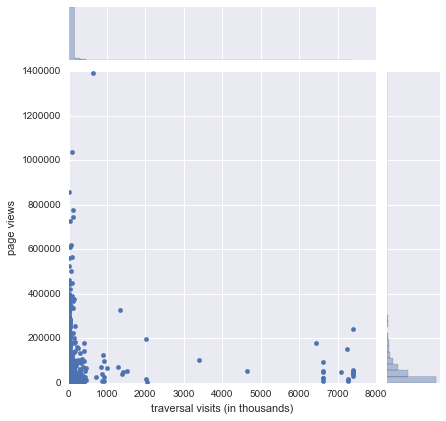

In [6]:
visits_top_df['traversal visits (in thousands)'] = visits_top_df['traversal visits'] / 1000.0

sns.jointplot(x="traversal visits (in thousands)", y="page views", data=visits_top_df, stat_func=None)



### in log space

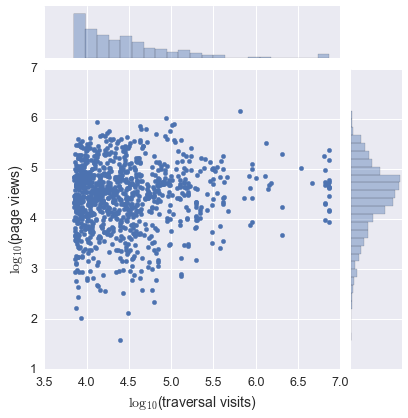

In [36]:
visits_top_df['log(traversal visits)'] = np.log10(visits_top_df['traversal visits'])
visits_top_df['log(page views)'] = np.log10(visits_top_df['page views'])

sns.set(font_scale=1.25)
g = sns.jointplot(visits_top_df["log(traversal visits)"], visits_top_df["log(page views)"], stat_func=None)

g.set_axis_labels("$\log_{10}$(traversal visits)", "$\log_{10}$(page views)", fontsize=14)


#save figure
plt.savefig(path+'views_visits.png', format='png', dpi=300, bbox_inches='tight')

### with annotations

In [ ]:
sns.set(font_scale=1.25)
g = sns.jointplot(visits_top_df["log(traversal visits)"], visits_top_df["log(page views)"], stat_func=None)
g.annotate("United State", (5.809719, 6.144095)

g.set_axis_labels("$\log_{10}$(traversal visits)", "$\log_{10}$(page views)", fontsize=14)

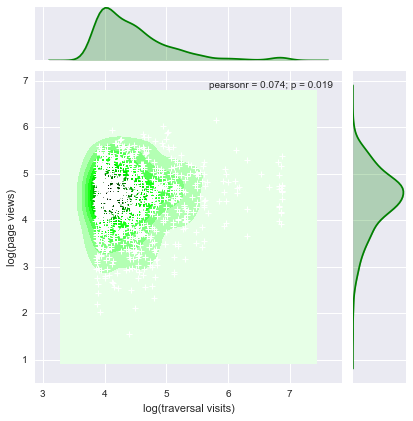

In [16]:
g = sns.jointplot(x="log(traversal visits)", y="log(page views)", data=visits_top_df, kind="kde", color="g")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")

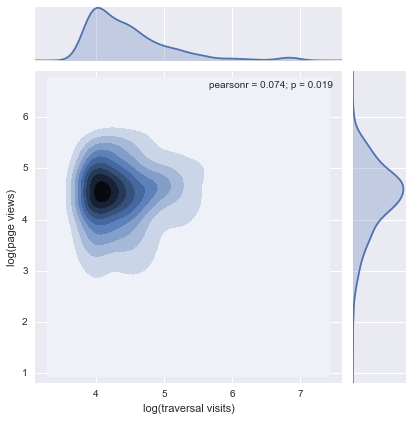

In [19]:
sns.jointplot(x="log(traversal visits)", y="log(page views)", data=visits_top_df, kind="kde")

In [30]:
#specific points in log-space
visits_top_df.sort_values(by='log(page views)', ascending=False)

,article,page views,traversal visits,log(traversal visits),log(page views)
7768454,United States,1393463,645237,5.809719,6.144095
9806172,India,1037860,87461,4.941814,6.016139
4681721,World War II,858787,13153,4.119025,5.933885
4931005,United Kingdom,776311,107720,5.032296,5.890036
5801744,Canada,744722,102345,5.010067,5.871994
8674350,China,726321,42541,4.628808,5.861129
6304743,Australia,617709,51048,4.707979,5.790784
8786739,Russia,610659,43487,4.638359,5.785799
161350,Germany,564323,97357,4.988367,5.751528
8343078,New York City,558418,18201,4.260095,5.746959


## Page Views and Traversal Funnels

In [20]:
funnels_top_df

,article,traversal funnels
7948850,Philosophy,7374892
224026,Presentation,30799
9030902,Tree of life (biology),29274
1344349,Southeast Europe,25745
11029885,Feudalism,19276
632584,Census-Designated Place,17483
7652704,United States Constitution,13952
7974918,Reality,13416
8629119,Health care,10762
7739754,BBC,8945


In [61]:
#runtime: ~15min

#alternate way to fetch views for top funnels (without sending too many server requests)
from time import sleep

#compute views for articles with highest traversal visits
funnels_top_df = funnels_df[:1000]

views_list = []

for i, a in enumerate(funnels_top_df['article']):
    try:
        views_list.append(get_page_views(a))
    except:
        try:
            sleep(1)
            views_list.append(get_page_views(a))
        except Exception as e:
            print i, a
            print e
            break

funnels_top_df['page views'] = views_list

#save to file
temp_store = "/Users/mark/Desktop/wiki_v4/"
funnels_top_df.to_json(temp_store + "top_views_and_funnels.json")

In [63]:
#read funnels and views from file
temp_store = "/Users/mark/Desktop/wiki_v4/"
funnels_top_df = pd.read_json(temp_store + "top_views_and_funnels.json")

In [64]:
funnels_top_df.describe()

,page views,traversal funnels
count,1000.000000,1000.000000
mean,22238.469000,7761.809000
std,95473.283722,233210.959832
min,0.000000,19.000000
25%,1698.500000,28.000000
50%,6504.000000,48.000000
75%,20477.250000,120.000000
max,2795502.000000,7374892.000000


In [65]:
funnels_top_df.sort_values(by='page views', ascending=False)

,article,page views,traversal funnels
6742736,Halloween,2795502,186
527322,Scientology,463257,232
5759147,Clint Eastwood,341534,72
1496615,Cold War,298464,1692
8743226,Sia Furler,270155,28
8281815,Armenia,259607,3943
7948850,Philosophy,240642,7374892
7652704,United States Constitution,233635,13952
6759575,Narcissism,202935,56
5437039,Cancer,194337,3219


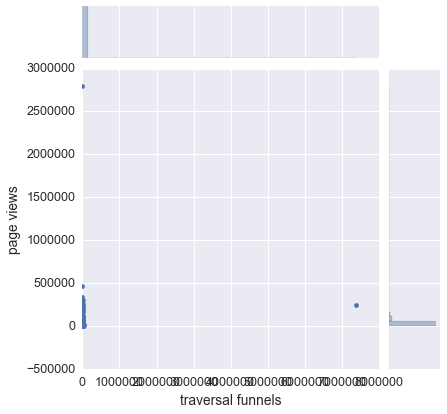

In [66]:
sns.jointplot(x="traversal funnels", y="page views", data=funnels_top_df, stat_func=None)

#save figure
plt.savefig(path+'funnels_visits.png', format='png', dpi=300, bbox_inches='tight')

Excluding Philosophy as an outlier: 

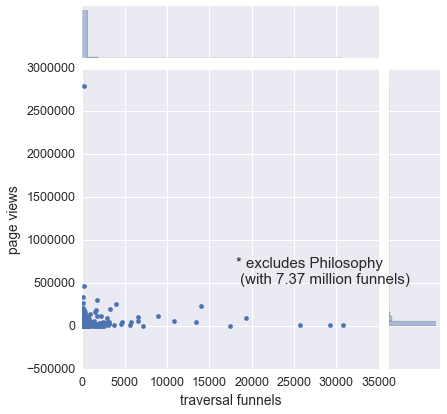

In [67]:
sns.jointplot(x="traversal funnels", y="page views", data=funnels_top_df[funnels_top_df['article'] != "Philosophy"], stat_func=None)

plt.text(-3000, 500000, "* excludes Philosophy \n (with 7.37 million funnels)")


### in log space

In [68]:
funnels_top_df['log(traversal funnels)'] = np.log10(funnels_top_df['traversal funnels']+1)
funnels_top_df['log(page views)'] = np.log10(funnels_top_df['page views']+1)


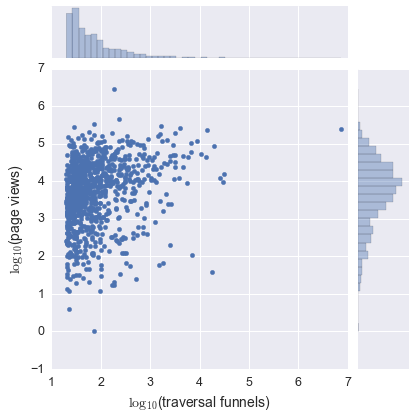

In [81]:

sns.set(font_scale=1.25)
g = sns.jointplot(funnels_top_df["log(traversal funnels)"], funnels_top_df["log(page views)"], stat_func=None)
g.set_axis_labels("$\log_{10}$(traversal funnels)", "$\log_{10}$(page views)", fontsize=14)

#save figure
plt.savefig(path+ 'views_funnels.png', format='png', dpi=300, bbox_inches='tight')

In [77]:
funnels_top_df.sort_values(by="log(page views)", ascending=False).head(10)

,article,page views,traversal funnels,log(traversal funnels),log(page views)
6742736,Halloween,2795502,186,2.271842,6.446460
527322,Scientology,463257,232,2.367356,5.665823
5759147,Clint Eastwood,341534,72,1.863323,5.533435
1496615,Cold War,298464,1692,3.228657,5.474893
8743226,Sia Furler,270155,28,1.462398,5.431615
8281815,Armenia,259607,3943,3.595937,5.414318
7948850,Philosophy,240642,7374892,6.867756,5.381373
7652704,United States Constitution,233635,13952,4.144668,5.368540
6759575,Narcissism,202935,56,1.755875,5.307359
5437039,Cancer,194337,3219,3.507856,5.288558


In [76]:
funnels_top_df.sort_values(by="log(traversal funnels)", ascending=False).head(10)

,article,page views,traversal funnels,log(traversal funnels),log(page views)
7948850,Philosophy,240642,7374892,6.867756,5.381373
224026,Presentation,15787,30799,4.488551,4.198327
9030902,Tree of life (biology),9571,29274,4.466497,3.981003
1344349,Southeast Europe,12216,25745,4.410710,4.086965
11029885,Feudalism,88076,19276,4.285039,4.944863
632584,Census-Designated Place,37,17483,4.242641,1.579784
7652704,United States Constitution,233635,13952,4.144668,5.368540
7974918,Reality,42940,13416,4.127655,4.632872
8629119,Health care,53926,10762,4.031933,4.731806
7739754,BBC,117953,8945,3.951629,5.071713


In [83]:
funnels_top_df.sort_values(by="log(page views)", ascending=True).head(10)

,article,page views,traversal funnels,log(traversal funnels),log(page views)
191120,List of minor planets/25001–25100,0,73,1.869232,0.000000
8937352,Crash Bar,3,22,1.361728,0.602060
9410770,Sweat Gland,11,96,1.986772,1.079181
9397861,Palmoplantar Keratoderma,11,22,1.361728,1.079181
2623881,Learning Disability,12,20,1.322219,1.113943
2963799,Queueing Theory,16,171,2.235528,1.230449
3175857,Caste System In India,16,181,2.260071,1.230449
5577458,William Iii Of England,18,31,1.505150,1.278754
7955822,Book Of Esther,19,56,1.755875,1.301030
8350645,Show Business,19,184,2.267172,1.301030
